In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dir = 'round4/'

def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    if np.isnan(bid):
        bid = 0
    elif np.isnan(ask):
        ask = 0
    return (bid+ask) / 2

prices_1_0 = pd.read_csv(dir+"prices_round_4_day_1.csv", delimiter=';')
prices_1_1 = pd.read_csv(dir+"prices_round_4_day_2.csv", delimiter=';')
prices_1_1['timestamp'] += 1000000 # shift day 2 to 0-24h
prices_1_2 = pd.read_csv(dir+"prices_round_4_day_3.csv", delimiter=';')
prices_1_2['timestamp'] += 2000000 # shift day 2 to 0-24h

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])
prices['mid_price'] = prices.apply(simple_mid_price, axis=1)
prices = prices[prices['product']=='MAGNIFICENT_MACARONS']

C:\Users\chris\AppData\Local\Temp\ipykernel_1296\730803264.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
C:\Users\chris\AppData\Local\Temp\ipykernel_1296\730803264.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dir = 'round4/'

def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    if np.isnan(bid):
        bid = 0
    elif np.isnan(ask):
        ask = 0
    return (bid+ask) / 2

obs_1 = pd.read_csv(dir+"observations_round_4_day_1.csv", delimiter=',')
obs_2 = pd.read_csv(dir+"observations_round_4_day_2.csv", delimiter=',')
obs_2['timestamp'] += 1000000 # shift day 2 to 0-24h
obs_3 = pd.read_csv(dir+"observations_round_4_day_3.csv", delimiter=',')
obs_3['timestamp'] += 2000000 # shift day 2 to 0-24h
obs_4 = pd.read_csv(dir+"observations_round_5_day_4.csv", delimiter=',')
obs_4['timestamp'] += 3000000 # shift day 2 to 0-24h


obs = pd.concat([obs_1, obs_2, obs_3, obs_4])
obs['MidPrice'] = obs.apply(lambda row: (row['bidPrice'] + row['askPrice']) / 2, axis=1)
obs

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,MidPrice
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,627.75
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,630.75
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,630.75
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,632.75
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,631.25
...,...,...,...,...,...,...,...,...,...
9995,3999500,745.0,746.5,1.6,7.5,-4.0,206.028012,59.94,745.75
9996,3999600,741.0,742.5,1.6,7.5,-4.0,205.991170,59.95,741.75
9997,3999700,744.5,746.0,1.6,7.5,-4.0,206.053141,59.96,745.25
9998,3999800,744.0,745.5,1.6,7.5,-4.0,205.751795,59.98,744.75


(3000000.0, 4000000.0)

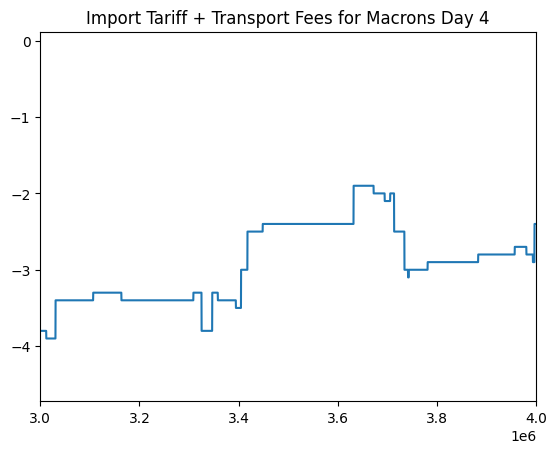

In [8]:
plt.plot(obs['timestamp'], obs['importTariff'] + obs['transportFees'])
plt.title("Import Tariff + Transport Fees for Macrons Day 4")
plt.xlim(3e6, 4e6)

In [9]:
# merge on timestamp
prices['timestamp'] = prices['timestamp'].astype(int)
obs['timestamp'] = obs['timestamp'].astype(int)

merged = pd.merge(prices, obs, on='timestamp', how='inner')
merged.head()

merged = merged[merged['product'] == 'MAGNIFICENT_MACARONS']


# drop product column
merged = merged.drop(columns=['product'])

merged.head(5)

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,mid_price,profit_and_loss,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,MidPrice
0,1,0,624.0,20.0,622.0,12.0,617.0,23.0,631,10,...,627.5,0.0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,627.75
1,1,100,627.0,14.0,625.0,12.0,620.0,21.0,634,7,...,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,630.75
2,1,200,627.0,10.0,625.0,15.0,620.0,21.0,634,5,...,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,630.75
3,1,300,629.0,14.0,627.0,14.0,622.0,26.0,636,7,...,632.5,0.0,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,632.75
4,1,400,628.0,18.0,625.0,16.0,620.0,26.0,635,9,...,631.5,0.0,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,631.25


In [10]:
merged['timestamp'].describe()

count    3.000000e+04
mean     1.499950e+06
std      8.660398e+05
min      0.000000e+00
25%      7.499750e+05
50%      1.499950e+06
75%      2.249925e+06
max      2.999900e+06
Name: timestamp, dtype: float64

In [133]:
def get_data(df):
    # make features
    # merged['shifted_mid_price'] = merged['MidPrice'].shift(-1)
    # merged['target'] = merged['shifted_mid_price'] - merged['MidPrice']

    # only predict when below CSI
    df = df.copy()
    csi = 46
    df['below_CSI'] = df['sunlightIndex'] < csi    
    df['sunlight_gradient'] = df['sunlightIndex'].diff(20)
    df['sugar_change'] = df['sugarPrice'].diff()
    df['macron_change'] = df['MidPrice'].diff() 

    df['future_sugar_change'] = df['sugar_change'].shift()
    df['future_macron_change'] = df['macron_change'].shift()
    df = df[df['below_CSI'] == True]

    df.dropna(inplace=True)

    # set features
    # features = ['sunlightIndex', 'sunlight_gradient', 'sugar_gradient', 'sugarPrice', 'importTariff', 'exportTariff']
    
    features = ['sunlight_gradient']
    target = ['future_sugar_change']

    test_data = df[df['timestamp'] > 2.0e6]
    val_data = df[df['timestamp'] > 2.0e6]
    train_data = df[df['timestamp'] <= 2.0e6]

    train_X = train_data[features].values
    train_y = train_data[target].values

    val_X = val_data[features].values
    val_Y = val_data[target].values

    test_X = test_data[features].values
    test_y = test_data[target].values

    # convert

    return train_X, train_y, val_X, val_Y, test_X, test_y

In [134]:
train_X, train_Y, val_X, val_Y, test_X, test_Y = get_data(merged)
print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

(4047, 1) (4047, 1) (2899, 1) (2899, 1) (2899, 1) (2899, 1)


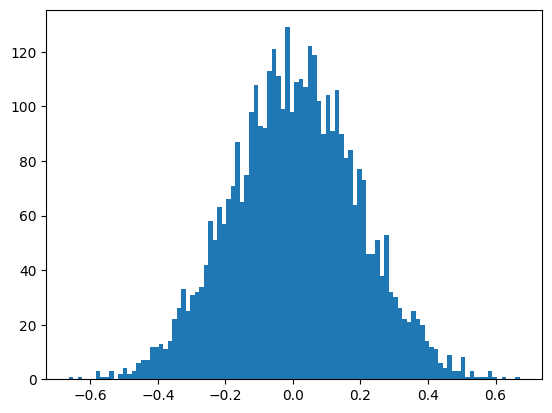

In [138]:
plt.hist(train_Y, bins=100)
plt.show()

In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [144]:
class Network(nn.Module):
    def __init__(self, input_size):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

def train_model(model, train_X, train_y, device, epochs=1000, learning_rate=0.001):
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    train_epochs = []
    val_losses = []
    val_epochs = []
    for epoch in range(epochs):

        model.train()
        optimizer.zero_grad()

        # np.random.seed(epoch)
        # np.random.shuffle(train_X)

        inputs = torch.tensor(train_X, dtype=torch.float32)
        targets = torch.tensor(train_y, dtype=torch.float32)

        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()/len(inputs)}')
            train_losses.append(loss.item()/len(inputs))
            train_epochs.append(epoch)
        if epoch % 100 == 0:
            # test on validation
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(val_X, dtype=torch.float32)
                val_targets = torch.tensor(val_Y, dtype=torch.float32)
                val_inputs = val_inputs.to(device)
                val_targets = val_targets.to(device)

                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_targets)
                print(f'->Validation Loss: {val_loss.item()/len(val_inputs)}')
                val_losses.append(val_loss.item()/len(val_inputs))
                val_epochs.append(epoch)

            
        
    return model, train_losses, train_epochs, val_losses, val_epochs

In [145]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

model = Network(input_size=train_X.shape[1])
model = model.to(device)

Using device: cuda


Epoch 0, Loss: 3.959466814847531e-05
->Validation Loss: 5.2429121418137435e-05
Epoch 100, Loss: 3.7192705533579305e-05
->Validation Loss: 5.061725021518893e-05
Epoch 200, Loss: 3.719143155241472e-05
->Validation Loss: 5.061861234272131e-05
Epoch 300, Loss: 3.7189152378019124e-05
->Validation Loss: 5.061955812183813e-05
Epoch 400, Loss: 3.718745128178202e-05
->Validation Loss: 5.06186226229291e-05
Epoch 500, Loss: 3.718601160942551e-05
->Validation Loss: 5.0619198314565424e-05
Epoch 600, Loss: 3.718409695565215e-05
->Validation Loss: 5.0619033831240765e-05
Epoch 700, Loss: 3.718105560177369e-05
->Validation Loss: 5.0620930529578304e-05
Epoch 800, Loss: 3.717774177793517e-05
->Validation Loss: 5.062016979420173e-05
Epoch 900, Loss: 3.717399715699766e-05
->Validation Loss: 5.062127491653932e-05


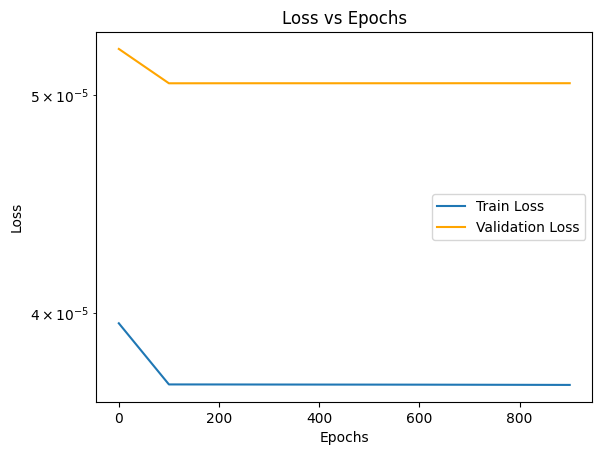

In [146]:
model, train_losses, X1, val_losses, X2 = train_model(model, train_X, train_Y, device, epochs=1000, learning_rate=0.001)

plt.plot(X1, train_losses, label='Train Loss')
plt.plot(X2, val_losses, label='Validation Loss', c='orange')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

Test Loss: 5.062157818266917e-05
R^2: -0.0002613067626953125


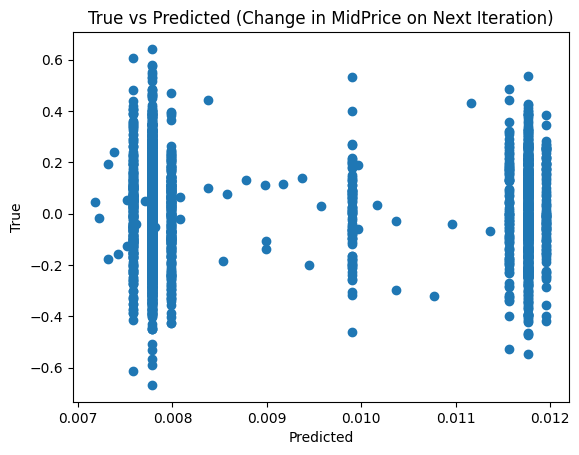

In [147]:
model.eval()

test_inputs = torch.tensor(test_X, dtype=torch.float32)
test_targets = torch.tensor(test_Y, dtype=torch.float32)

test_inputs = test_inputs.to(device)
test_targets = test_targets.to(device)

with torch.no_grad():
    test_outputs = model(test_inputs)
    test_loss = F.l1_loss(test_outputs, test_targets)
    print(f'Test Loss: {test_loss.item()/len(test_inputs)}')


target = test_targets.cpu().numpy()
pred = test_outputs.cpu().numpy()
plt.scatter(pred, target, label='Predicted')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('True vs Predicted (Change in MidPrice on Next Iteration)')

# plot y = x
x = np.linspace(-5, 5, 100)

# check r^2
from sklearn.metrics import r2_score
r2 = r2_score(target, pred)
print(f'R^2: {r2}')

# x = np.arange(len(target))
# plt.xlabel('Predicted')
# plt.twinx()
# plt.plot(x, pred, label='Predicted', c='red')
# plt.legend()
# plt.title("True vs Predicted")